# Paquetes

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Carga de datos y separación en sets de entrenamiento y prueba

In [7]:
df=np.load("proyecto_training_data.npy")
df

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [8]:
train_index=np.random.choice(len(df), int(0.8 * len(df)), replace=False)

In [9]:
train=df[train_index]

In [10]:
test=df[~np.isin(np.arange(len(df)), train_index)]

In [11]:
len(train)

1168

In [12]:
len(test)

292

# Ánalisis exploratorio

In [13]:
columnas=["SalePrice","Quality","1stFloor","Rooms","YearBuilt","LotFrontage"]

SalePrice:
Media: 180210.2
Máximo: 745000.0
Mínimo: 34900.0
Rango: 710100.0
Desviación estándar: 78180.9


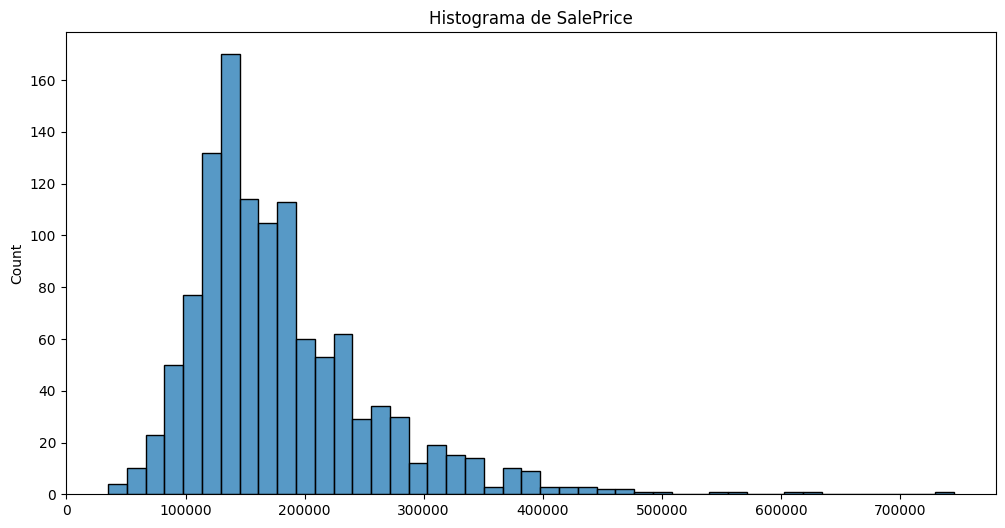


Quality:
Media: 6.08
Máximo: 10.0
Mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.38


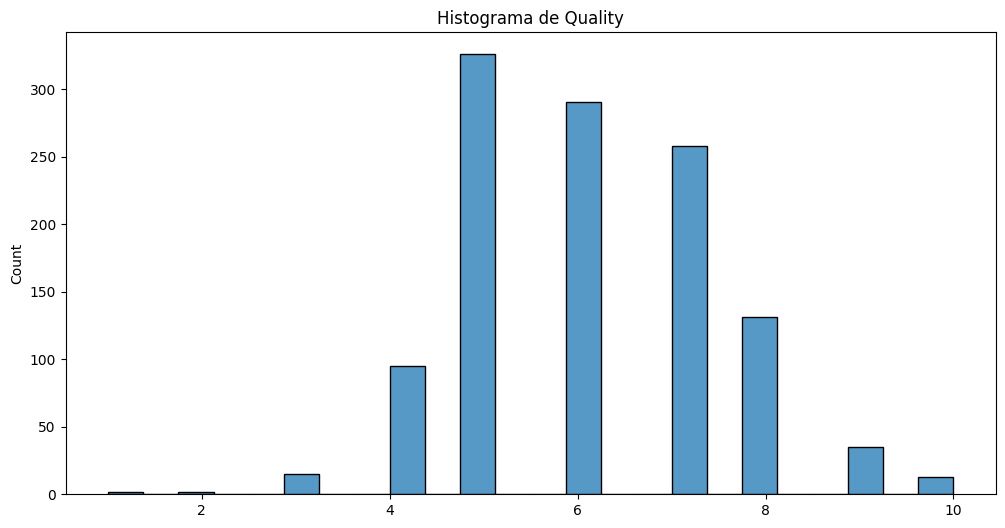


1stFloor:
Media: 1164.24
Máximo: 3228.0
Mínimo: 334.0
Rango: 2894.0
Desviación estándar: 378.84


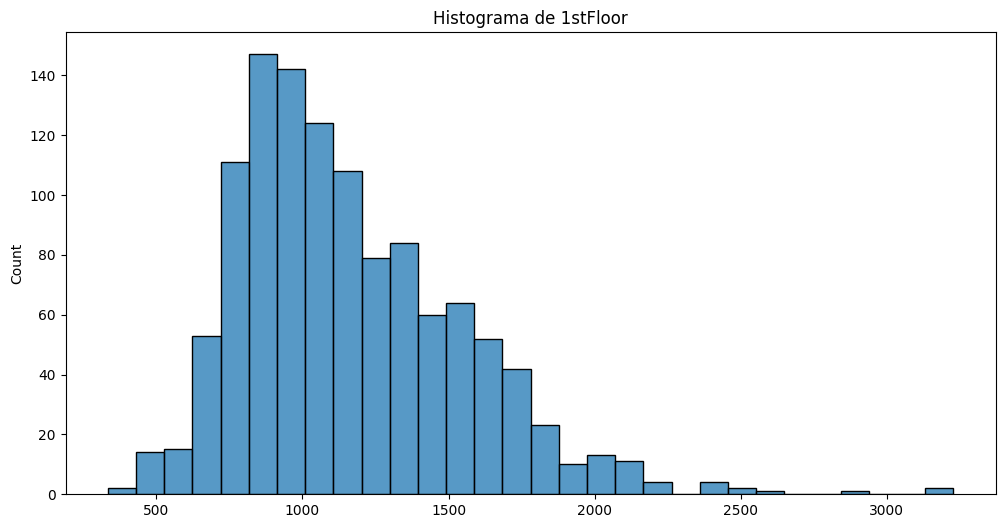


Rooms:
Media: 6.52
Máximo: 14.0
Mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.62


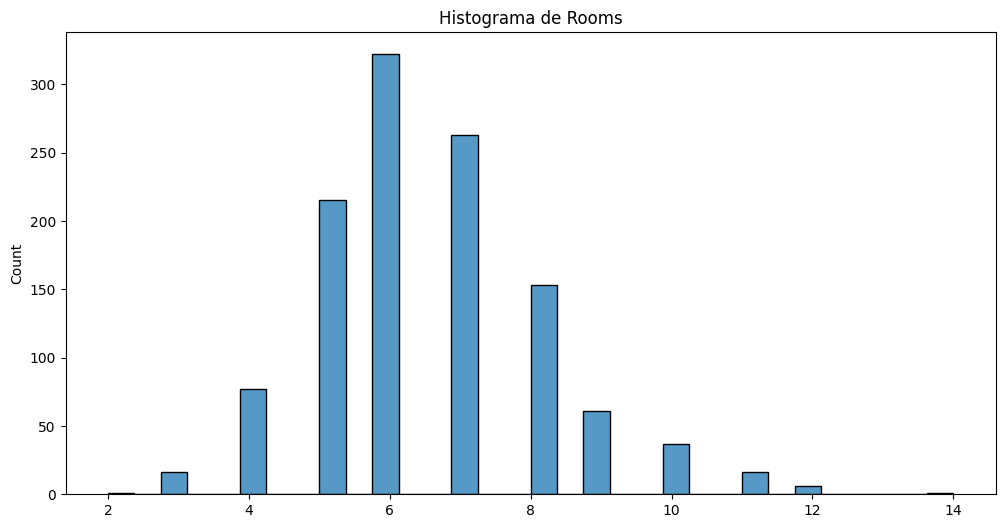


YearBuilt:
Media: 1971.57
Máximo: 2010.0
Mínimo: 1872.0
Rango: 138.0
Desviación estándar: 30.0


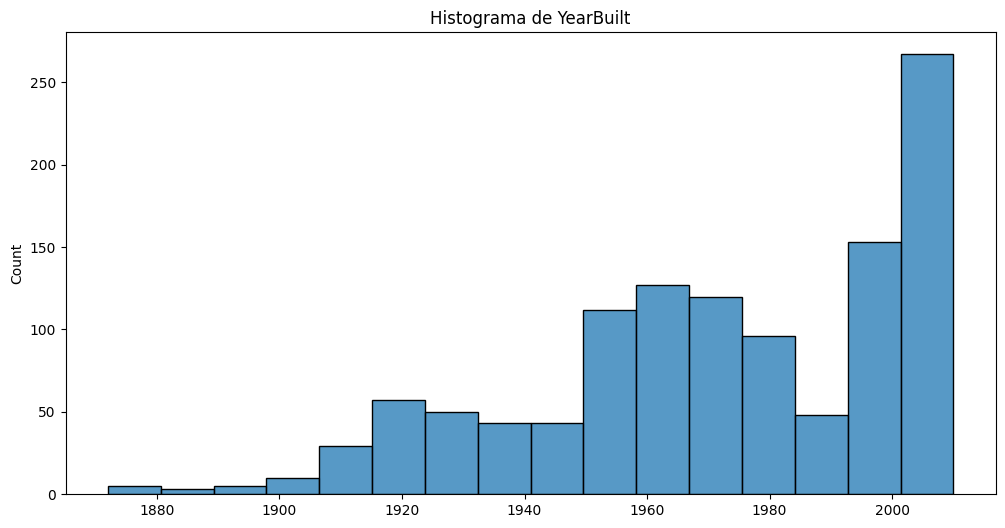


LotFrontage:
Media: 70.09
Máximo: 313.0
Mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.97


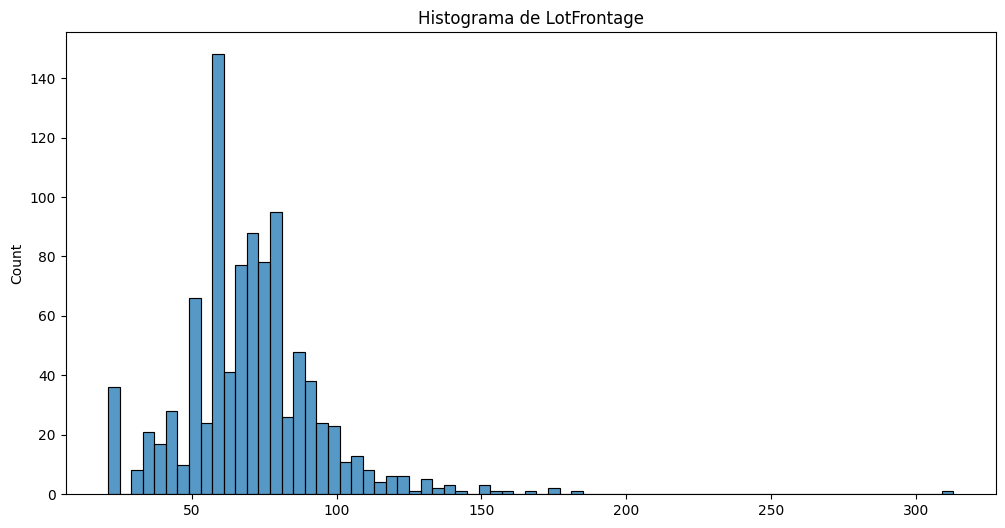

In [14]:
for i in range(0,len(columnas)):
    print(columnas[i]+":")
    print("Media:",round(np.nanmean(train[:,i]),2))
    print("Máximo:",round(np.nanmax(train[:,i]),2))
    print("Mínimo:",round(np.nanmin(train[:,i]),2))
    print("Rango:",round(np.nanmax(train[:,i]),2)-round(np.nanmin(train[:,i]),2))
    print("Desviación estándar:",round(np.nanstd(train[:,i]),2))
    plt.figure(figsize=(12,6))
    sns.histplot(train[:,i])
    plt.title("Histograma de "+columnas[i])
    plt.show()
    print("")

# Correlación entre precio y predictoras

In [15]:
train_df=pd.DataFrame(train, columns=columnas)
test_df=pd.DataFrame(test, columns=columnas)

In [16]:
train_corr=train_df.corr()
train_corr

,SalePrice,Quality,1stFloor,Rooms,YearBuilt,LotFrontage
SalePrice,1.000000,0.794034,0.617172,0.516800,0.528530,0.370607
Quality,0.794034,1.000000,0.462125,0.419390,0.566917,0.237081
1stFloor,0.617172,0.462125,1.000000,0.391126,0.272097,0.415415
Rooms,0.516800,0.419390,0.391126,1.000000,0.074818,0.340352
YearBuilt,0.528530,0.566917,0.272097,0.074818,1.000000,0.109191
LotFrontage,0.370607,0.237081,0.415415,0.340352,0.109191,1.000000


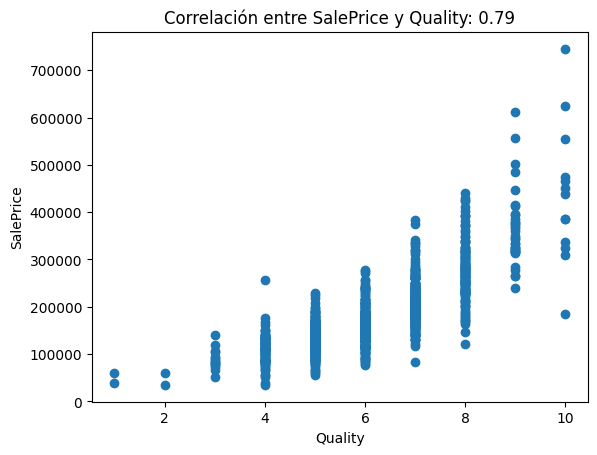

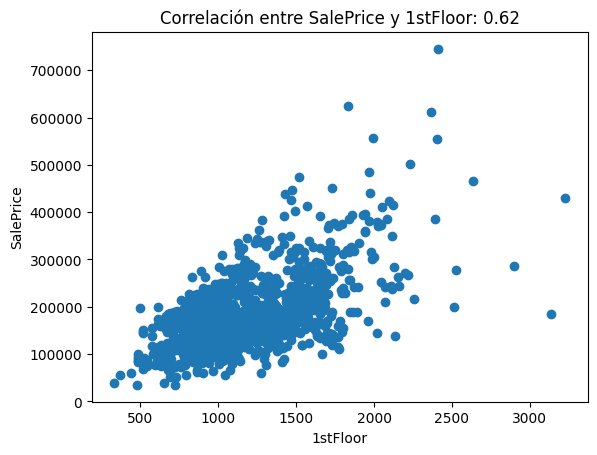

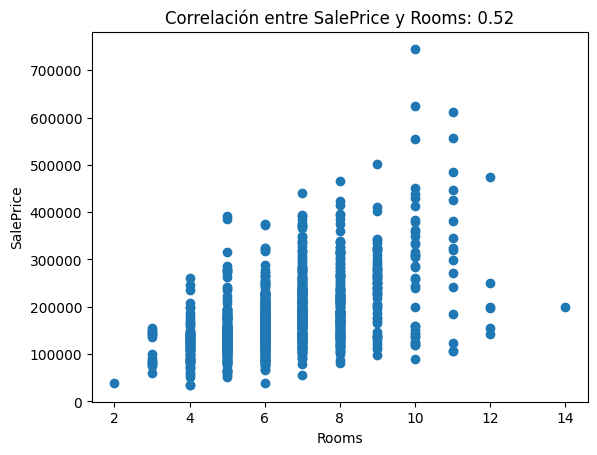

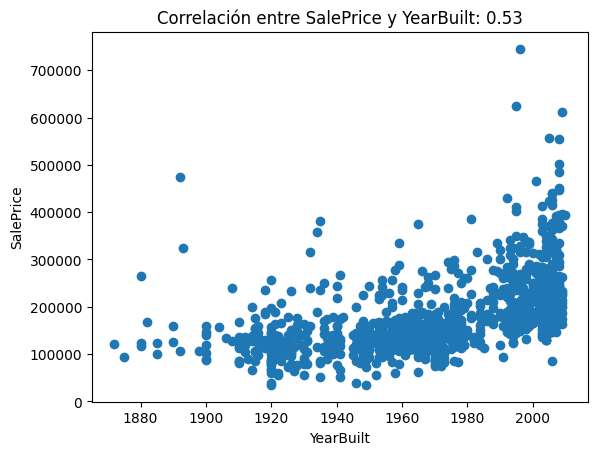

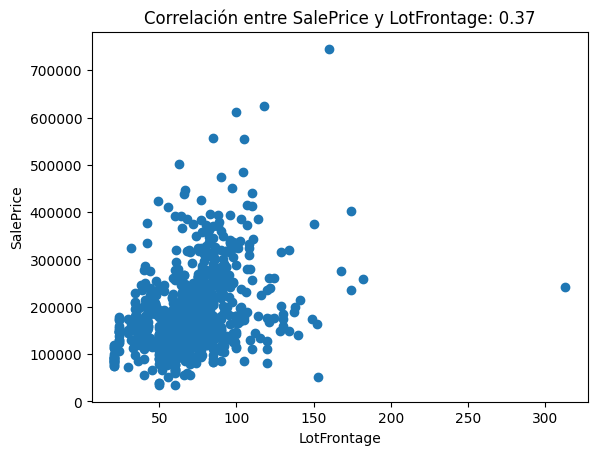

In [17]:
for i in columnas[1:]:
    plt.scatter(train_df[i], train_df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title("Correlación entre SalePrice y "+i+": "+str(round(train_corr["SalePrice"].loc[i],2)))
    plt.show()


Las dos variables con mayor poder predictivo son Quality y 1stFloor.

# Modelo de regresión lineal

In [18]:
class Regresiones:
    def __init__(self):
        self.dict_modelos={}
        self.errores=[]
        self.pred_manual=[]
        self.pred_sklearn=[]
        self.pred_promedio=[]
        self.colores = [
        '#FF3333',  
        '#FFFF33',  
        '#33FF33',  
        '#3333FF',  
        '#FF5733',  
        '#5733FF', 
        '#33FFF9',  
        '#F933FF',  
        '#FF337A',  
        '#FFA933',  
        '#33FFA9',  
        '#B433FF',  
        '#FF33A9',  
        '#33A9FF',  
        '#A933FF',  
        '#FF3398', 
        '#3398FF', 
        '#FF3398']
        
    def regresion(self, x,y,epochs,imprimir_error_cada,learning_rate):
        matriz=np.column_stack([x, np.ones(len(x))])
        #beta1 en la columna 0 y beta0 en la columna 1
        betas=np.array([0,0])
        for i in range(0, epochs):
            yhat=np.dot(matriz, betas)
            error=sum((y-yhat)**2)/(2*len(y))
            self.errores.append(error)
            gradiente=np.dot((yhat-y),matriz)/len(y)
            self.dict_modelos[i]=[betas, yhat, x, y]
            betas=betas-learning_rate*gradiente
            try:
                if i%imprimir_error_cada==0 and i!=0:
                    print ("Error de la iteración",str(i)+":",str(error))
            except ZeroDivisionError:
                pass
        return self.dict_modelos, self.errores


    def grafica_errores(self):
        plt.plot(range(len(self.errores)), self.errores)
        plt.xlabel("Iteraciones")
        plt.ylabel("Error")
        plt.title("Error del modelo")
        plt.show()


    def grafica_modelos(self, n):
        x=self.dict_modelos[0][2]
        y=self.dict_modelos[0][3]
        plt.scatter(x, y)
        for i in self.dict_modelos:
            if i%n==0 and i!=0:
                yhat=self.dict_modelos[i][1]
                plt.plot(x, yhat, color=self.colores[int(i/n)], label=('Modelo'+" "+str(i)))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()    

        
    def regresionsk(self,x,y):
        self.modeloSK = LinearRegression().fit(x, y)
    
        
    def predicciones(self,x):
        betas=self.dict_modelos[list(self.dict_modelos)[-1]][0]
        matriz=np.column_stack([x, np.ones(len(x))])
        self.prediccion_manual=np.dot(matriz, betas)

        self.prediccion_sklearn=self.modeloSK.predict(x)

        self.prediccion_promedio=(self.prediccion_manual + self.prediccion_sklearn)/2

        return self.prediccion_manual, self.prediccion_sklearn, self.prediccion_promedio


    def errores_modelos(self, y):
        titulos=["Modelo manual", "Modelo sklearn", "Modelo promedio"]
        errores=[]
        for i in [self.prediccion_manual, self.prediccion_sklearn, self.prediccion_promedio]:
            error=np.sqrt(sum((y-i)**2)/(len(y)))
            errores.append(error)
        bp=sns.barplot(x=titulos, y=errores)
        for i, v in enumerate(errores):
            bp.text(i, v + 0.5, str(round(v,2)), ha='center')
        plt.xlabel('Modelo')
        plt.ylabel('RMSE')
        plt.title('RMSE por modelo')
        plt.show()

# Quality

## Entrenamiento con modelo manual

In [19]:
regresion_quality=Regresiones()

In [20]:
regresion_quality.regresion(train_df["Quality"], train_df["SalePrice"],15000,100,.0499)

Error de la iteración 100: 3381988608.487666
Error de la iteración 200: 1467815149.2602537
Error de la iteración 300: 1214954826.5039403
Error de la iteración 400: 1167853088.257143
Error de la iteración 500: 1151513847.2181942
Error de la iteración 600: 1142883066.3425446
Error de la iteración 700: 1137700999.6469073
Error de la iteración 800: 1134503547.539607
Error de la iteración 900: 1132520192.0379949
Error de la iteración 1000: 1131288695.3782318
Error de la iteración 1100: 1130523894.330011
Error de la iteración 1200: 1130048909.9491801
Error de la iteración 1300: 1129753915.9803631
Error de la iteración 1400: 1129570706.6852853
Error de la iteración 1500: 1129456922.4811428
Error de la iteración 1600: 1129386255.5114102
Error de la iteración 1700: 1129342366.9884727
Error de la iteración 1800: 1129315109.5235424
Error de la iteración 1900: 1129298180.9658067
Error de la iteración 2000: 1129287667.2930257
Error de la iteración 2100: 1129281137.6573021
Error de la iteración 2200

({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       7.0
   1       5.0
   2       5.0
   3       7.0
   4       8.0
          ... 
   1163    8.0
   1164    7.0
   1165    8.0
   1166    8.0
   1167    7.0
   Name: Quality, Length: 1168, dtype: float64,
   0       250000.0
   1       117000.0
   2       135000.0
   3       250000.0
   4       280000.0
             ...   
   1163    266000.0
   1164    179900.0
   1165    369900.0
   1166    319000.0
   1167    189000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([58979.88876164,  8992.48891164]),
   array([421851.71024315, 303891.93271986, 303891.93271986, ...,
          480831.59900479, 480831.59900479, 421851.71024315]),
   0       7.0
   1       5.0
   2       5.0
   3       7.0
   4       8.0
          ... 
   1163    8.0
   1164    7.0
   1165    8.0
   1166    8.0
   1167    7.0
   Name: Quality, Length: 1168, dtype: float64,
   0       250000.0
   1       117000.0
   2       135000.0
   3 

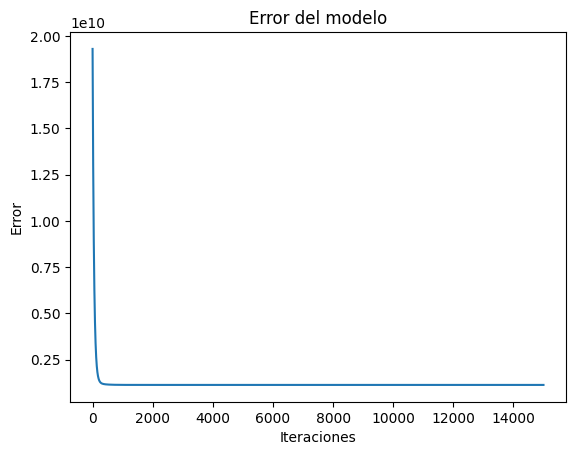

In [21]:
regresion_quality.grafica_errores()

El error no disminuye considerablemente luego de 4000 iteraciones, entonces se entrenará con 4000.

In [22]:
regresion_quality=Regresiones()
regresion_quality.regresion(train_df["Quality"], train_df["SalePrice"],4000,100,.0499)

Error de la iteración 100: 3381988608.487666
Error de la iteración 200: 1467815149.2602537
Error de la iteración 300: 1214954826.5039403
Error de la iteración 400: 1167853088.257143
Error de la iteración 500: 1151513847.2181942
Error de la iteración 600: 1142883066.3425446
Error de la iteración 700: 1137700999.6469073
Error de la iteración 800: 1134503547.539607
Error de la iteración 900: 1132520192.0379949
Error de la iteración 1000: 1131288695.3782318
Error de la iteración 1100: 1130523894.330011
Error de la iteración 1200: 1130048909.9491801
Error de la iteración 1300: 1129753915.9803631
Error de la iteración 1400: 1129570706.6852853
Error de la iteración 1500: 1129456922.4811428
Error de la iteración 1600: 1129386255.5114102
Error de la iteración 1700: 1129342366.9884727
Error de la iteración 1800: 1129315109.5235424
Error de la iteración 1900: 1129298180.9658067
Error de la iteración 2000: 1129287667.2930257
Error de la iteración 2100: 1129281137.6573021
Error de la iteración 2200

({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       7.0
   1       5.0
   2       5.0
   3       7.0
   4       8.0
          ... 
   1163    8.0
   1164    7.0
   1165    8.0
   1166    8.0
   1167    7.0
   Name: Quality, Length: 1168, dtype: float64,
   0       250000.0
   1       117000.0
   2       135000.0
   3       250000.0
   4       280000.0
             ...   
   1163    266000.0
   1164    179900.0
   1165    369900.0
   1166    319000.0
   1167    189000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([58979.88876164,  8992.48891164]),
   array([421851.71024315, 303891.93271986, 303891.93271986, ...,
          480831.59900479, 480831.59900479, 421851.71024315]),
   0       7.0
   1       5.0
   2       5.0
   3       7.0
   4       8.0
          ... 
   1163    8.0
   1164    7.0
   1165    8.0
   1166    8.0
   1167    7.0
   Name: Quality, Length: 1168, dtype: float64,
   0       250000.0
   1       117000.0
   2       135000.0
   3 

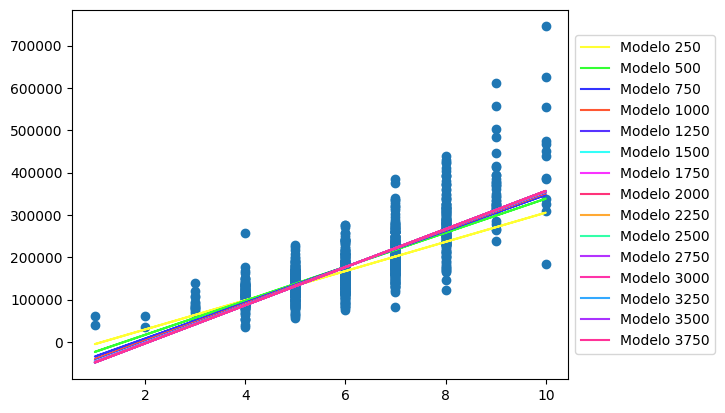

In [23]:
regresion_quality.grafica_modelos(250)

## Entrenamiento con sklearn

In [24]:
regresion_quality.regresionsk(train_df[["Quality"]], train_df["SalePrice"])

## Validación con test

In [25]:
regresion_quality.predicciones(test_df[["Quality"]])

(array([266491.06036587, 221461.72782661, 266491.06036587, 266491.06036587,
         86373.73020883, 131403.06274809, 131403.06274809, 221461.72782661,
        266491.06036587, 221461.72782661, 221461.72782661,  86373.73020883,
        221461.72782661, 221461.72782661, 131403.06274809,  86373.73020883,
        131403.06274809, 176432.39528735, 266491.06036587, 176432.39528735,
        221461.72782661, 176432.39528735, 176432.39528735, 176432.39528735,
        131403.06274809, 221461.72782661, 266491.06036587, 221461.72782661,
        131403.06274809, 176432.39528735, 266491.06036587, 221461.72782661,
         86373.73020883, 131403.06274809, 221461.72782661, 221461.72782661,
        221461.72782661, 131403.06274809, 221461.72782661, 266491.06036587,
        221461.72782661, 221461.72782661, 221461.72782661,  86373.73020883,
        221461.72782661, 176432.39528735, 131403.06274809, 221461.72782661,
        131403.06274809, 131403.06274809, 176432.39528735, 221461.72782661,
        2664

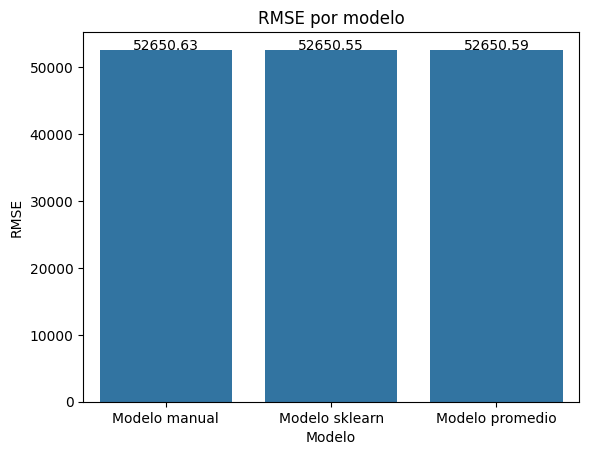

In [26]:
regresion_quality.errores_modelos(test_df["SalePrice"])

El mejor modelo es el modelo de sklearn, aunque los tres tienen errores muy cercanos.

# 1stFloor

## Entrenamiento con modelo manual

In [51]:
regresion_1f=Regresiones()

In [52]:
regresion_1f.regresion(train_df["1stFloor"], train_df["SalePrice"],100000,10000,.000001333)

Error de la iteración 10000: 1940705120.8104663
Error de la iteración 20000: 1940581069.1398733
Error de la iteración 30000: 1940457333.706125
Error de la iteración 40000: 1940333913.703063
Error de la iteración 50000: 1940210808.326577
Error de la iteración 60000: 1940088016.7746115
Error de la iteración 70000: 1939965538.2471526
Error de la iteración 80000: 1939843371.9462276
Error de la iteración 90000: 1939721517.0759


({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       1392.0
   1        984.0
   2       1098.0
   3       1020.0
   4       1836.0
            ...  
   1163    1095.0
   1164    1442.0
   1165    2028.0
   1166    1826.0
   1167    1028.0
   Name: 1stFloor, Length: 1168, dtype: float64,
   0       250000.0
   1       117000.0
   2       135000.0
   3       250000.0
   4       280000.0
             ...   
   1163    266000.0
   1164    179900.0
   1165    369900.0
   1166    319000.0
   1167    189000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([3.04041314e+02, 2.40220195e-01]),
   array([423225.74946199, 299176.89330491, 333837.60311351, ...,
          616596.02523626, 555179.67978594, 312554.71112577]),
   0       1392.0
   1        984.0
   2       1098.0
   3       1020.0
   4       1836.0
            ...  
   1163    1095.0
   1164    1442.0
   1165    2028.0
   1166    1826.0
   1167    1028.0
   Name: 1stFloor, Length: 1168, dtype: float6

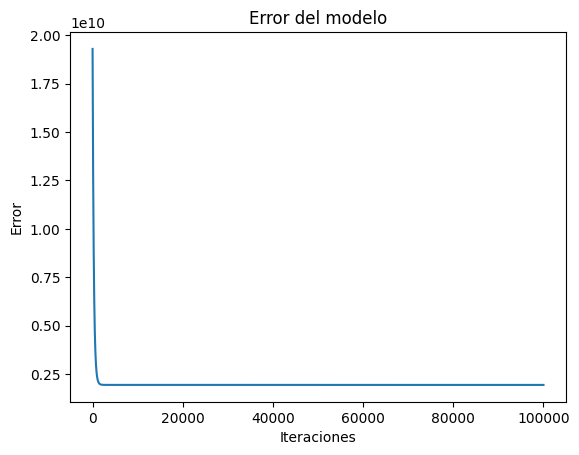

In [53]:
regresion_1f.grafica_errores()

El error sigue disminuyendo ligeramente luego de 100,000 iteraciones, pero por costo computacional es dejará en 100,000.

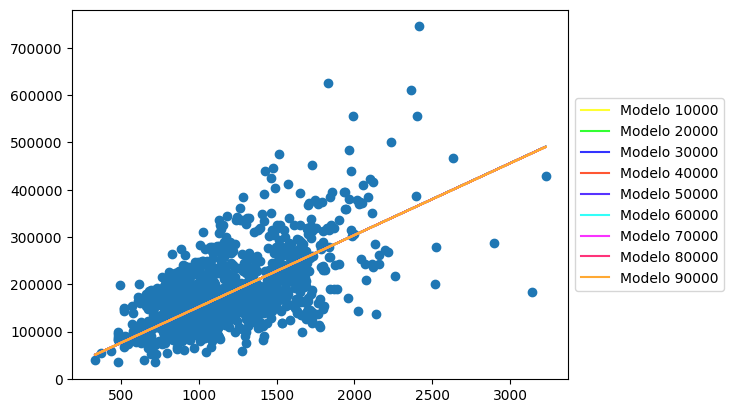

In [54]:
regresion_1f.grafica_modelos(10000)

## Entrenamiento con sklearn

In [55]:
regresion_1f.regresionsk(train_df[["1stFloor"]], train_df["SalePrice"])

## Validación con test

In [56]:
regresion_1f.predicciones(test_df[["1stFloor"]])

(array([257634.44814599, 130082.63100825, 243360.79241867, 187784.64352294,
        175333.15661188, 202058.29925026, 134638.05304888, 230909.30550761,
        251864.24689452, 130993.71541638, 335532.16504082, 113834.95906332,
        337961.7234625 , 134789.90045024, 165311.22812248, 144963.67634099,
        103964.87797528, 179888.57865251, 237742.43856856, 191732.67595816,
        186569.86431211, 218457.81859654, 110949.85843759, 241234.92879971,
        127956.76738929, 185051.39029856, 197199.18240692, 255812.27932974,
        147545.08216401,  87261.6638263 , 117934.83889989, 150885.72499381,
        134334.35824618, 123097.65054595, 127956.76738929, 137219.45887191,
        185203.23769992, 186266.1695094 , 110494.31623353, 260519.54877173,
        141926.7283139 , 173055.44559156, 227872.35748052, 131601.1050218 ,
        184747.69549585,  73747.24510575, 138889.78028681, 215117.17576674,
        131904.7998245 , 135397.29005566,  95461.42349944, 185962.47470669,
        2471

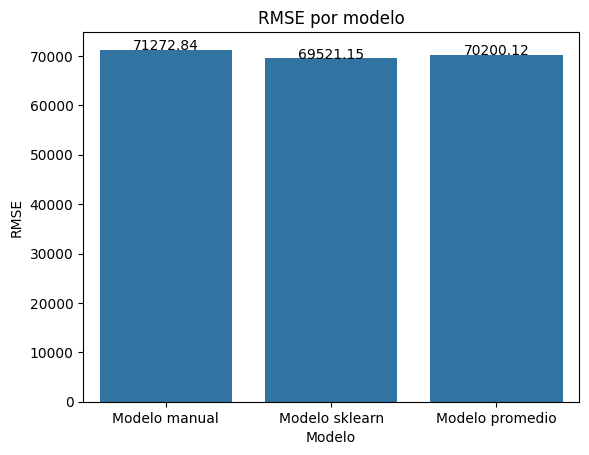

In [57]:
regresion_1f.errores_modelos(test_df["SalePrice"])

El mejor modelo es el modelo de sklearn. Se podría haber reducido el error del modelo manual con más iteraciones, pero el costo computacional se considera mayor que lo que se reducía el error.